In [31]:
import glob
import json
import os
import random

import cv2
import matplotlib.pyplot as plt
import yaml

max. / min. resolution of vehicle bbox(w, h): (11542.5859374009, 6334.8002920199), (3.2963867376029277, 1.648193310000236)


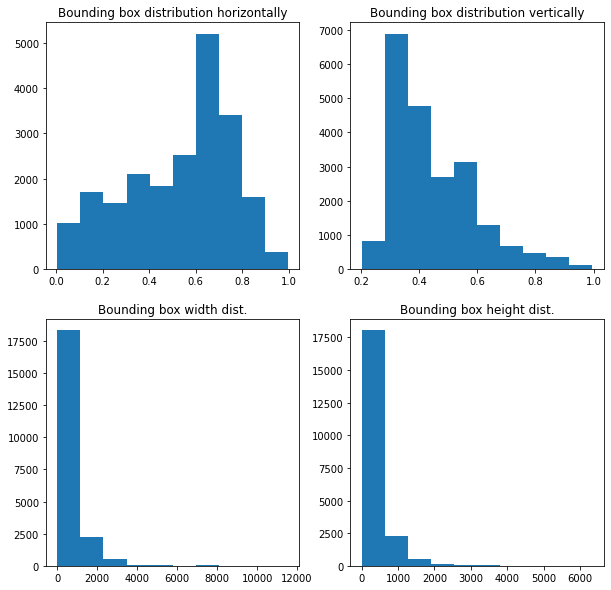

In [27]:
base_dir = os.path.expanduser('~/datasets/panda')

annos_dir = os.path.join(base_dir, 'panda_round1_train_annos_202104')
vehicle_path = os.path.join(annos_dir, 'vehicle_bbox_train.json')
person_path = os.path.join(annos_dir, 'person_bbox_train.json')

with open(vehicle_path) as fp:
    vehicle_bboxs = json.load(fp)

middle_xs, middle_ys = [], []
bbox_ws, bbox_hs = [], []
max_w, max_h = .0, .0
min_w, min_h = 1e9, 1e9

for image_path, values in vehicle_bboxs.items():
    image_id = values['image id']
    image_size = values['image size']
    height, width = image_size['height'], image_size['width']
    for obj in values['objects list']:
        category = obj['category']
        rect = obj['rect']
        
        tl_x, tl_y = rect['tl']['x'], rect['tl']['y']
        br_x, br_y = rect['br']['x'], rect['br']['y']
        middle_xs.append((tl_x + br_x) / 2)
        middle_ys.append((tl_y + br_y) / 2)

        bbox_w, bbox_h = (br_x - tl_x) * width, (br_y - tl_y) * height
        bbox_ws.append(bbox_w)
        bbox_hs.append(bbox_h)
        max_w, max_h = max(max_w, bbox_w), max(max_h, bbox_h)
        min_w, min_h = min(min_w, bbox_w), min(min_h, bbox_h)
        
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0][0].hist(middle_xs)
axs[0][0].set_title('Bounding box distribution horizontally')
axs[0][1].hist(middle_ys)
axs[0][1].set_title('Bounding box distribution vertically')
axs[1][0].hist(bbox_ws)
axs[1][0].set_title('Bounding box width dist.')
axs[1][1].hist(bbox_hs)
axs[1][1].set_title('Bounding box height dist.')
print(f'max. / min. resolution of vehicle bbox(w, h): ({max_w}, {max_h}), ({min_w}, {min_h})')            

max. / min. resolution of person bbox(w, h): (6608.37169790135, 7283.303711013197), (2.8806319593494516, 3.279357935999849)


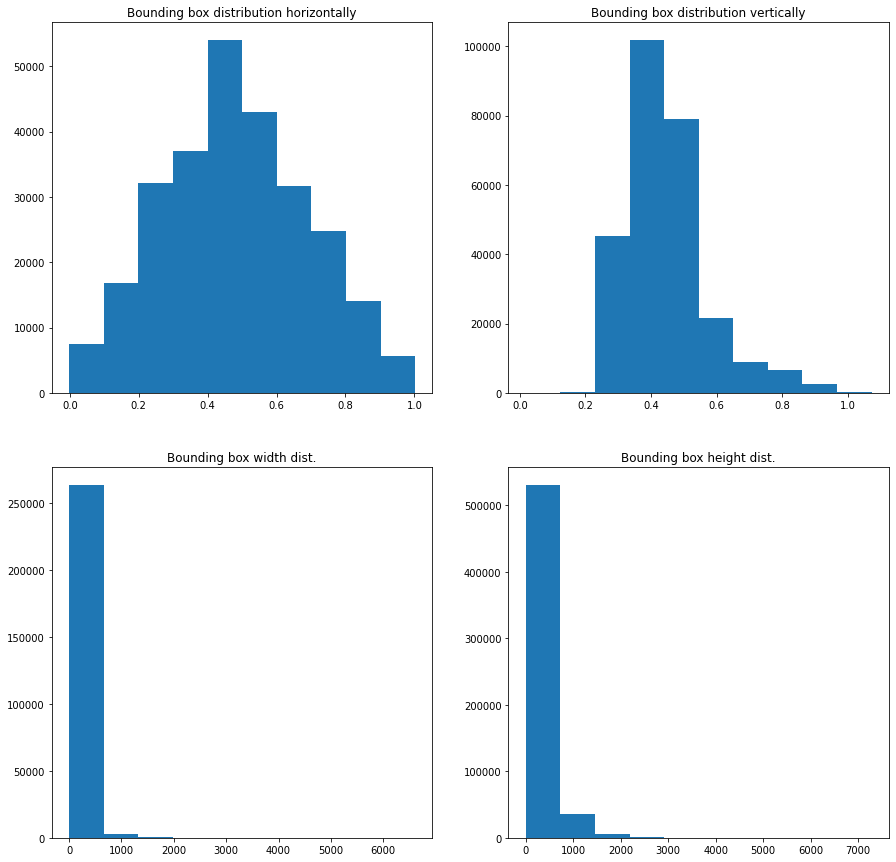

In [7]:
with open(person_path) as fp:
    person_bboxs = json.load(fp)

middle_xs, middle_ys = [], []
bbox_ws, bboxs_hs = [], []
max_w, max_h = .0, .0
min_w, min_h = 1e9, 1e9

for image_path, values in person_bboxs.items():
    image_id = values['image id']
    image_size = values['image size']
    height, width = image_size['height'], image_size['width']
    for obj in values['objects list']:
        category = obj['category']
        if category == 'person':
            rects = obj['rects']
            head = rects['head']
            visible_body = rects['visible body']
            full_body = rects['full body']

            middle_xs.append((head['br']['x'] + head['tl']['x']) / 2)
            middle_xs.append((visible_body['br']['x'] + visible_body['tl']['x']) / 2)
            middle_xs.append((full_body['br']['x'] + full_body['tl']['x']) / 2)
            middle_ys.append((head['br']['y'] + head['tl']['y']) / 2)
            middle_ys.append((visible_body['br']['y'] + visible_body['tl']['y']) / 2)
            middle_ys.append((full_body['br']['y'] + full_body['tl']['y']) / 2)

            head_w = head['br']['x'] - head['tl']['x']
            head_h = head['br']['y'] - head['tl']['y']
            visible_body_w = visible_body['br']['x'] - visible_body['tl']['x']
            visible_body_h = visible_body['br']['y'] - visible_body['tl']['y']
            full_body_w = full_body['br']['x'] - full_body['tl']['x']
            full_body_h = full_body['br']['y'] - full_body['tl']['y']
            bbox_ws.extend([head_w * width, visible_body_w * width, full_body_w * width])
            bbox_hs.extend([head_h * height, visible_body_h * height, full_body_h * height])
            max_w = max(max_w, max(head_w, visible_body_w, full_body_w) * width)
            max_h = max(max_h, max(head_h, visible_body_h, full_body_h) * height)
            min_w = min(min_w, min(head_w, visible_body_w, full_body_w) * width)
            min_h = min(min_h, min(head_h, visible_body_h, full_body_h) * height)

        else:
            rect = obj['rect']
            tl_x, tl_y = rect['tl']['x'], rect['tl']['y']
            br_x, br_y = rect['br']['x'], rect['br']['y']
            middle_xs.append((tl_x + br_x) / 2)
            middle_ys.append((tl_y + br_y) / 2)

            bbox_w, bbox_h = (br_x - tl_x) * width, (br_y - tl_y) * height
            bbox_ws.append(bbox_w)
            bbox_hs.append(bbox_h)
            max_w, max_h = max(max_w, bbox_w), max(max_h, bbox_h)
            min_w, min_h = min(min_w, bbox_w), min(min_h, bbox_h)

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs[0][0].hist(middle_xs)
axs[0][0].set_title('Bounding box distribution horizontally')
axs[0][1].hist(middle_ys)
axs[0][1].set_title('Bounding box distribution vertically')
axs[1][0].hist(bbox_ws)
axs[1][0].set_title('Bounding box width dist.')
axs[1][1].hist(bbox_hs)
axs[1][1].set_title('Bounding box height dist.')

print(f'max. / min. resolution of person bbox(w, h): ({max_w}, {max_h}), ({min_w}, {min_h})')

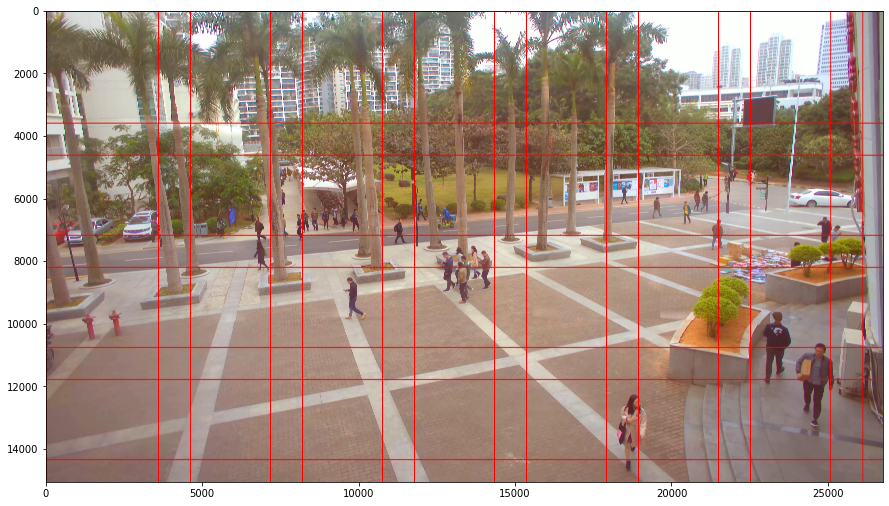

In [34]:
train_image_dir1 = os.path.join(base_dir, 'panda_round1_train_202104_part1')
train_image_dir2 = os.path.join(base_dir, 'panda_round1_train_202104_part2')

image_list = glob.glob(os.path.join(base_dir, 'panda_round1_train_202104_part?/*/*.jpg'))
image_path = random.choice(image_list)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape
side_length, overlap = 1536 * 3, 1024
# Split image evenly.
for h in range(0, height, side_length - overlap):
    for w in range(0, width, side_length - overlap):
        tl_x, tl_y = w, h
        br_x, br_y = w + side_length, h + side_length
        img = cv2.rectangle(img, (tl_x, tl_y), (br_x, br_y), (255, 0, 0), 30)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(img)
plt.show()

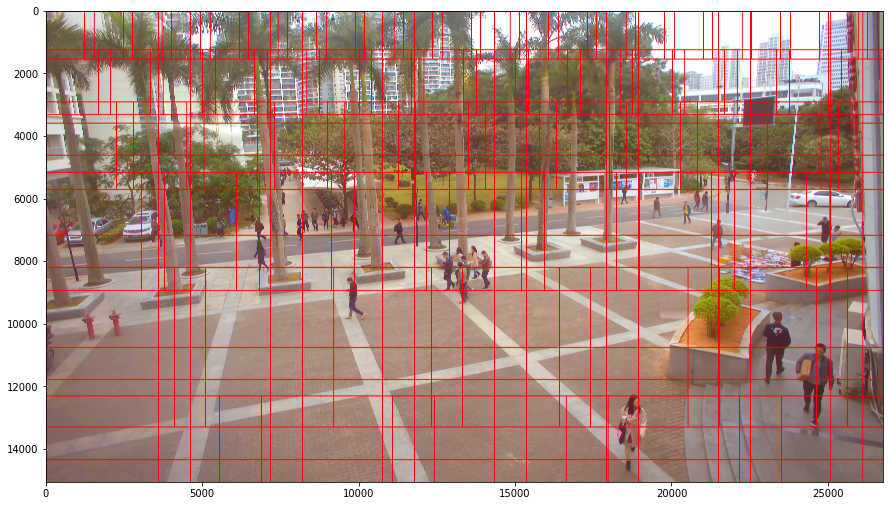

In [35]:
# Split image from small size to large size.
side_length, overlap = 1536 * 3, 1024

curh, curw = 0, 0
slide_length, overlap = 1536, 300
while curh <= height:
    while curw <= width:
        tl_x, tl_y = curw, curh
        br_x, br_y = curw + slide_length, curh + slide_length
        img = cv2.rectangle(img, (tl_x, tl_y), (br_x, br_y), (255, 0, 0), 30)
        curw += slide_length - overlap
    curh += slide_length - overlap
    curw = 0
    slide_length = int(slide_length * 1.35)
    overlap = int(overlap * 1.35)

fig, ax = plt.subplots(figsize=(15, 10))
ax.imshow(img)
plt.show()